## Transfer Learning using Keras 

Please download the dataset from the below url

In [1]:
# Importing Tensorflow
import tensorflow as tf

In [2]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.3.1
Keras Version: 2.4.0


In [3]:
pwd

'D:\\JUPYTER\\PROJECTS\\Malaria_Cell_Detection'

In [4]:
import glob, os, shutil

In [5]:
source_dir = '/Dataset/Parasitized' #Path where your files are at the moment
dst1 = '/Dataset/Train' #Path you want to move your files to
dst2 = '/Dataset/Test' #Path you want to move your files to

In [6]:
files = glob.iglob(os.path.join(source_dir, "*.png"))

In [7]:
def move_files(cnt,src,dest):
    files = glob.iglob(os.path.join(src, "*.png"))
    i = 0
    for file in files:
        i = i + 1
        if os.path.isfile(file):
            shutil.copy2(file, dest)
            if i == cnt:
                break
            else:
                continue

In [8]:
move_files(5000,source_dir,dst1)

In [9]:
# resize()

In [10]:
# Checking if CPU or GPU is available
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)    
    if len(out_) > 0:
        print(f"{device} is available")        
        print("details\n",out_)
    else:
        print(f"{device} not available")

GPU not available
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [11]:
# Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [12]:
#!pip install keras-tuner

In [13]:
#import keras_tuner

In [49]:
# Importing all the necessary libraries to build the model

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,MaxPool2D,Conv2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from glob import glob
    

In [27]:
img_shape = (224, 224, 3)

In [28]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [37]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3, 3),
                 input_shape=img_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters=256, kernel_size=(3, 3),
                 input_shape=img_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters=512, kernel_size=(3, 3),
                 input_shape=img_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters=1024, kernel_size=(3, 3),
                 input_shape=img_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [38]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [39]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [40]:
# Use the Image Data Generator for augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   vertical_flip=0.2
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [42]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [43]:
len(test_set)

5

In [44]:
def get_log_path(log_dir="logs"):
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")    
    log_path = os.path.join(log_dir, fileName)
    print(f"saving logs at:\n{log_path}")
    return log_path

In [45]:
import time
log_dir = get_log_path()
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

saving logs at:
logs\log_2021_01_03_12_26_19


In [46]:
train_labels = np.array([0,1])

In [50]:
callback = EarlyStopping(monitor='val_loss', patience=5)

In [51]:
model.fit_generator(training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
 callbacks=[callback])

Epoch 1/50
13/13 [==============================] - 55s 4s/step - loss: 0.6946 - accuracy: 0.4760 - val_loss: 0.6882 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 54s 4s/step - loss: 0.6944 - accuracy: 0.4832 - val_loss: 0.6840 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 47s 4s/step - loss: 0.6927 - accuracy: 0.5288 - val_loss: 0.6708 - val_accuracy: 0.6791
Epoch 4/50
13/13 [==============================] - 46s 4s/step - loss: 0.6918 - accuracy: 0.5264 - val_loss: 0.6722 - val_accuracy: 0.6791
Epoch 5/50
13/13 [==============================] - 45s 3s/step - loss: 0.6930 - accuracy: 0.5288 - val_loss: 0.6718 - val_accuracy: 0.6791
Epoch 6/50
13/13 [==============================] - 45s 3s/step - loss: 0.6915 - accuracy: 0.5288 - val_loss: 0.6774 - val_accuracy: 0.6791
Epoch 7/50
13/13 [==============================] - 45s 3s/step - loss: 0.6920 - accuracy: 0.5288 - val_loss: 0.6746 - val_accuracy: 0.6791
Epoch 8/50
13/13 [==

In [52]:
plt.rcParams['figure.figsize'] = [11.0, 7.0]
plt.rcParams['figure.dpi'] = 90

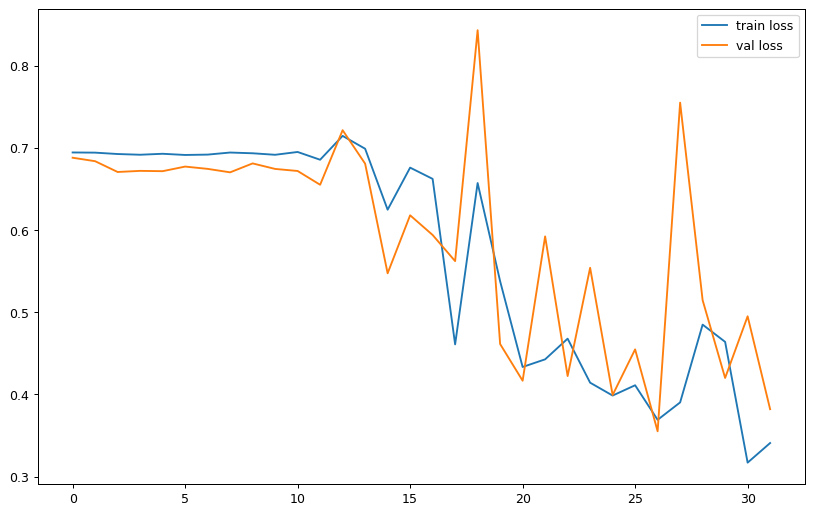

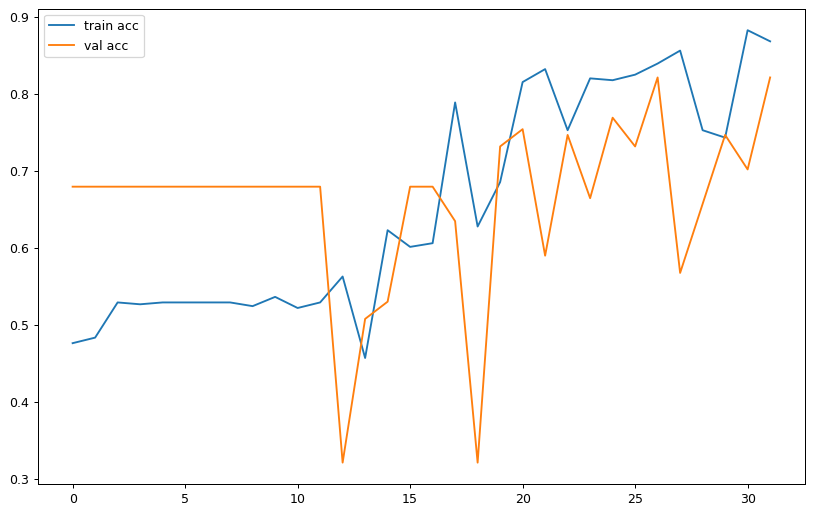

<Figure size 990x630 with 0 Axes>

In [53]:
# plot the loss
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model.history.history['accuracy'], label='train acc')
plt.plot(model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [54]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('CNN_Model.h5')

In [199]:
img=image.load_img('Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_110115_cell_110.png',target_size=(224,224,3))

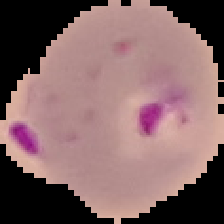

In [200]:
img

In [201]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [202]:
x.shape

(224, 224, 3)

In [203]:
x=x/255

In [204]:
x.shape

(224, 224, 3)

In [205]:
import numpy as np
x=np.expand_dims(x,axis=0)

In [206]:
x.shape

(1, 224, 224, 3)

In [207]:
#cnn = load_model('CNN_Model.h5')

In [208]:
a = cnn.predict(x)

In [209]:
m=np.argmax(a)

In [210]:
if(m==1):
    print("UnInfected")
else:
    print("Infected")

Infected


## Transfer Learning Using VGG16

In [92]:
from tensorflow.keras.applications.vgg16 import VGG16

In [93]:
vgg16Model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [94]:
for layer in vgg16Model.layers:
    layer.trainable = False

In [95]:
x = Flatten()(vgg16Model.output)

In [96]:
predictions = Dense(2, activation='softmax') (x)

In [97]:
modelnet = Model(inputs=vgg16Model.input, outputs=predictions)

In [98]:
modelnet.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [99]:
# tell the model what cost and optimization method to use
modelnet.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [100]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
    restore_best_weights=True,
)

In [101]:
# fit the model
# Run the cell. It will take some time to execute
results = modelnet.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set) ,
  callbacks=[tensorboard_callback,early_stop]  
)

Epoch 1/50
 1/13 [=>............................] - ETA: 0s - loss: 0.8821 - accuracy: 0.4375WARNING:tensorflow:From C:\Users\Dibyaranjan\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
13/13 [==============================] - 70s 5s/step - loss: 1.1140 - accuracy: 0.5889 - val_loss: 1.2934 - val_accuracy: 0.3433
Epoch 2/50
13/13 [==============================] - 70s 5s/step - loss: 0.6690 - accuracy: 0.6514 - val_loss: 0.5206 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 75s 6s/step - loss: 0.5474 - accuracy: 0.7115 - val_loss: 0.6007 - val_accuracy: 0.6567
Epoch 4/50
13/13 [==============================] - 75s 6s/step - loss: 0.4065 - accuracy: 0.7957 - val_loss: 0.4562 - val_accuracy: 0.7761
Epoch 5/50
13/13 [==============================] - 71s 5s/step - loss

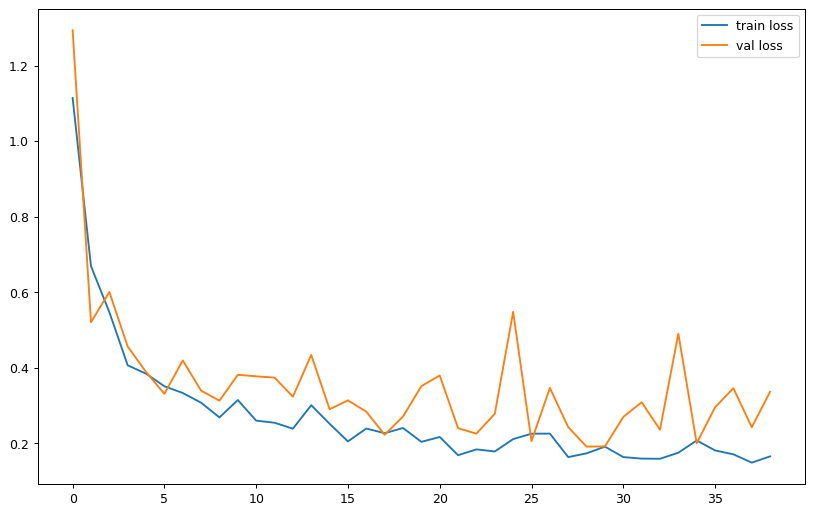

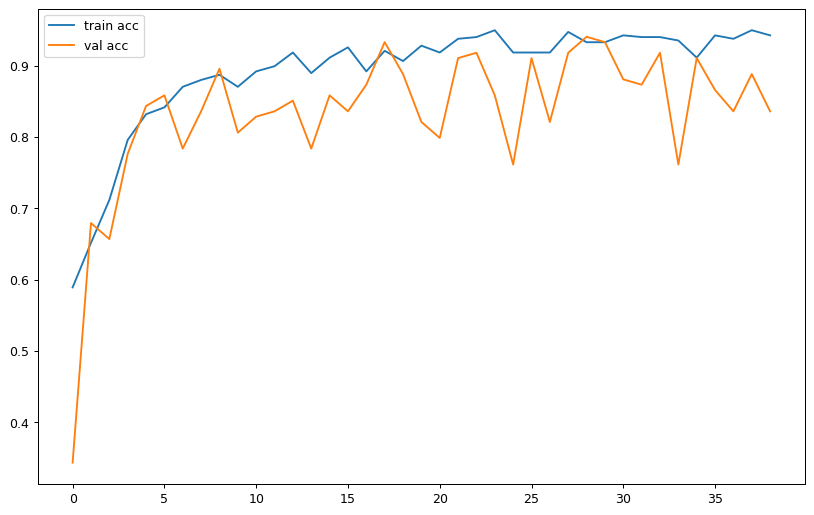

<Figure size 990x630 with 0 Axes>

In [102]:
# plot the loss
plt.plot(results.history['loss'], label='train loss')
plt.plot(results.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(results.history['accuracy'], label='train acc')
plt.plot(results.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [103]:
modelnet.save('model_vgg16.h5')

In [104]:
from tensorflow.keras.models import load_model

In [105]:
vgg_new = load_model('model_vgg16.h5')

In [106]:
from tensorflow.keras.preprocessing import image

In [107]:
pwd

'D:\\JUPYTER\\PROJECTS\\Malaria_Cell_Detection'

In [163]:
img=image.load_img('Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163047_cell_183.png',target_size=(224,224,3))

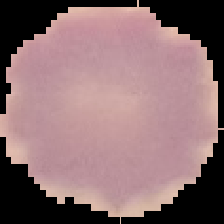

In [164]:
img

In [165]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [166]:
x.shape

(224, 224, 3)

In [167]:
x=x/255

In [168]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [169]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)

In [170]:
img_data.shape

(1, 224, 224, 3)

In [171]:
vgg_new.predict(img_data)

array([[4.2853917e-06, 9.9999571e-01]], dtype=float32)

In [172]:
a=np.argmax(vgg_new.predict(img_data), axis=1)

In [173]:
a

array([1], dtype=int64)

In [174]:
if(a==0):
    print("UnInfected")
else:
    print("Infected")

Infected
